<a href="https://colab.research.google.com/github/Weedi2002/AI-ML-Internship-Tasks/blob/main/Intern_Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -----------------------------------------------------------
# TASK 03: House Price Prediction
# Dataset: Kaggle House Price Prediction (Ames housing dataset)
# Model: Linear Regression
# Evaluation: MAE, RMSE
#Author: Waleed Ur Rehman Azam

#Internship: AI/ML Engineering (Remote)

#Date: 26 November 2025
# -----------------------------------------------------------


# **Step 0: Import required libraries**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

sns.set(style="whitegrid")

# **Step 1: Download and unzip dataset**

In [7]:
import os

# Kaggle credentials
os.environ['KAGGLE_USERNAME'] = "Waleed Khan"
os.environ['KAGGLE_KEY'] = "KGAT_7f3e135dd6461b89021985b4a42820d1E"

# Create the directory Kaggle expects
os.makedirs("/root/.config/kaggle", exist_ok=True)

# Create a dummy kaggle.json so Kaggle stops raising errors
with open("/root/.config/kaggle/kaggle.json", "w") as f:
    f.write('{"username":"%s","key":"%s"}' % (os.environ['KAGGLE_USERNAME'], os.environ['KAGGLE_KEY']))

print("Kaggle authentication FIXED!")

Kaggle authentication FIXED!


In [8]:
!pip install kaggle --quiet

In [10]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 469MB/s]


In [11]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **Step 2: Load Dataset**

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Step 3: Explore the Dataset**

In [13]:
train.shape

(1460, 81)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Step 4: Check Missing Values**

In [16]:
train.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


# **Step 5: Handle Missing Values**

In [21]:
# Fill numerical missing values with median
num_cols = train.select_dtypes(include=[np.number]).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

# Fill categorical missing values with mode
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])

# **Step 6: Select Features for Model**

In [18]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
            'FullBath', 'YearBuilt', 'Neighborhood']

X = train[features]
y = train["SalePrice"]

# **Step 7: Train-Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Step 8: Encode Categorical Columns (One-Hot Encoding)**

In [23]:
# Identify categorical and numeric columns
categorical_features = ['Neighborhood']
numeric_features = [col for col in features if col != 'Neighborhood']

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# **Step 9: Transform Data**

In [24]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# **Step 10: Train Models**

In [33]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

lr_pred = lr.predict(X_test_transformed)
print("Model Training Complete!")

Model Training Complete!


# **Step 11: Evaluate Models**

In [27]:
def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"📌 {model_name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 30)

evaluate("Linear Regression", y_test, lr_pred)

📌 Linear Regression
MAE : 22328.56
RMSE: 36467.80
------------------------------


# **Step 12: Visualize Actual vs Predicted**

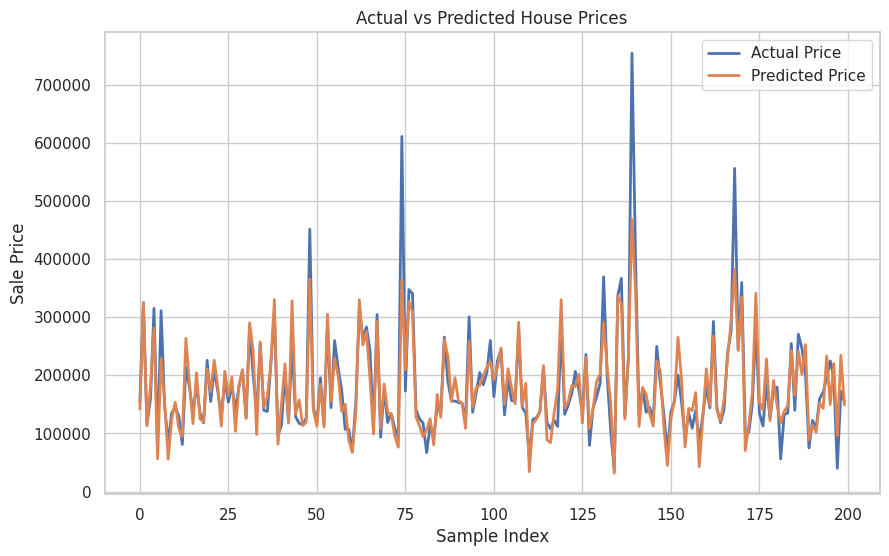

In [31]:
# Line plot comparison

plt.figure(figsize=(10,6))
plt.plot(y_test.values[:200], label="Actual Price", linewidth=2)
plt.plot(lr_pred[:200], label="Predicted Price", linewidth=2)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

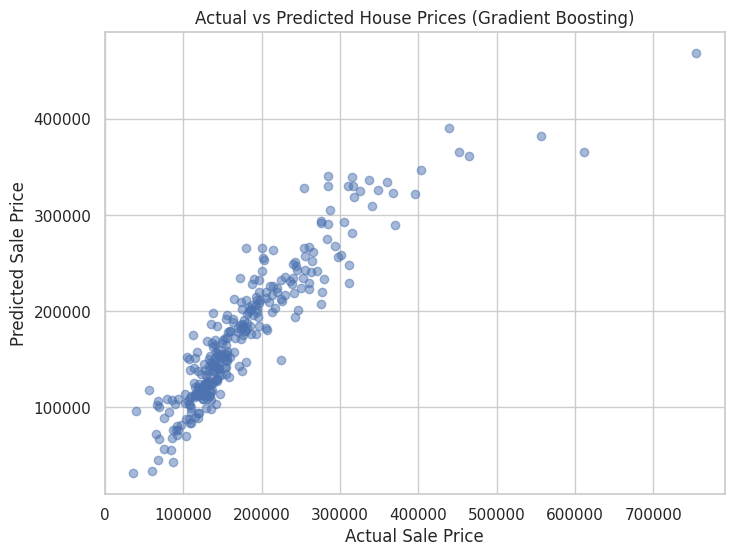

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices (Gradient Boosting)")
plt.show()